### Aryaman Gautam
### J001

In [1]:
from gensim.models import LdaMulticore, TfidfModel,Nmf
import re
import pandas as pd
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('papers.csv')
df.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [3]:
required = ['id', 'title', 'paper_text']
df = df[required]

In [4]:
df.head()

,id,title,paper_text
0,1,Self-Organization of Associative Database and ...,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,A Mean Field Theory of Layer IV of Visual Cort...,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,Storing Covariance by the Associative Long-Ter...,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,Bayesian Query Construction for Neural Network...,Bayesian Query Construction for Neural\nNetwor...
4,1001,"Neural Network Ensembles, Cross Validation, an...","Neural Network Ensembles, Cross\nValidation, a..."


In [5]:
import nltk
from gensim.parsing.preprocessing import strip_tags, strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords, strip_short, preprocess_string

lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()

df['paper_text_tokenized'] = df['paper_text'].apply(lambda text: preprocess_string(text, [
    strip_tags, 
    strip_punctuation, 
    strip_multiple_whitespaces, 
    strip_numeric, 
    remove_stopwords, 
    strip_short, 
    lemmatizer.lemmatize, 
    lambda x: x.lower()
]))


In [6]:
df.head()

,id,title,paper_text,paper_text_tokenized
0,1,Self-Organization of Associative Database and ...,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,"[self, organization, associative, database, an..."
1,10,A Mean Field Theory of Layer IV of Visual Cort...,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,"[mean, field, theory, layer, visual, cortex, a..."
2,100,Storing Covariance by the Associative Long-Ter...,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,"[storing, covariance, the, associative, long, ..."
3,1000,Bayesian Query Construction for Neural Network...,Bayesian Query Construction for Neural\nNetwor...,"[bayesian, query, construction, neural, networ..."
4,1001,"Neural Network Ensembles, Cross Validation, an...","Neural Network Ensembles, Cross\nValidation, a...","[neural, network, ensembles, cross, validation..."


In [7]:
df['paper_text_tokenized'][0]

['self',
 'organization',
 'associative',
 'database',
 'and',
 'its',
 'applications',
 'hisashi',
 'suzuki',
 'suguru',
 'arimoto',
 'osaka',
 'university',
 'toyonaka',
 'osaka',
 'japan',
 'abstract',
 'efficient',
 'method',
 'self',
 'organizing',
 'associative',
 'databases',
 'proposed',
 'applications',
 'robot',
 'eyesight',
 'systems',
 'the',
 'proposed',
 'databases',
 'associate',
 'input',
 'output',
 'half',
 'discussion',
 'algorithm',
 'self',
 'organization',
 'proposed',
 'from',
 'aspect',
 'hardware',
 'produces',
 'new',
 'style',
 'neural',
 'network',
 'half',
 'applicability',
 'handwritten',
 'letter',
 'recognition',
 'autonomous',
 'mobile',
 'robot',
 'demonstrated',
 'introduction',
 'let',
 'mapping',
 'given',
 'here',
 'finite',
 'infinite',
 'set',
 'finite',
 'infinite',
 'set',
 'learning',
 'machine',
 'observes',
 'set',
 'pairs',
 'sampled',
 'randomly',
 'means',
 'cartesian',
 'product',
 'and',
 'computes',
 'estimate',
 'small',
 'estimation'

In [8]:
df['paper_text_tokenized_2'] = [' '.join(map(str, l)) for l in df['paper_text_tokenized']]

In [9]:
df.head()

,id,title,paper_text,paper_text_tokenized,paper_text_tokenized_2
0,1,Self-Organization of Associative Database and ...,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,"[self, organization, associative, database, an...",self organization associative database and its...
1,10,A Mean Field Theory of Layer IV of Visual Cort...,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,"[mean, field, theory, layer, visual, cortex, a...",mean field theory layer visual cortex and its ...
2,100,Storing Covariance by the Associative Long-Ter...,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,"[storing, covariance, the, associative, long, ...",storing covariance the associative long term p...
3,1000,Bayesian Query Construction for Neural Network...,Bayesian Query Construction for Neural\nNetwor...,"[bayesian, query, construction, neural, networ...",bayesian query construction neural network mod...
4,1001,"Neural Network Ensembles, Cross Validation, an...","Neural Network Ensembles, Cross\nValidation, a...","[neural, network, ensembles, cross, validation...",neural network ensembles cross validation acti...


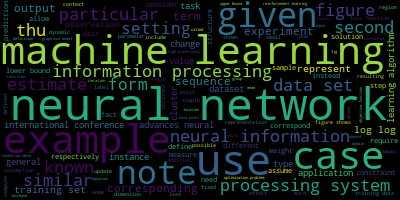

In [10]:
long_string = ' '.join(df['paper_text_tokenized_2'])

wordcloud = WordCloud()

wordcloud.generate(long_string)

wordcloud.to_image()


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


def _10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    print(words)
    
    
count_vectorizer = CountVectorizer(stop_words='english')

count_data = count_vectorizer.fit_transform(df['paper_text_tokenized_2'])

_10_most_common_words(count_data, count_vectorizer)


['learning', 'model', 'data', 'algorithm', 'set', 'function', 'time', 'figure', 'number', 'problem']


In [13]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
number_topics = 10
number_words = 10

lda = LDA(n_components=number_topics)
lda.fit(count_data)

print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)


Topics found via LDA:

Topic #0:
algorithm learning set function bound problem theorem log let algorithms

Topic #1:
network networks neural input time output training learning set hidden

Topic #2:
matrix data kernel problem algorithm sparse rank learning method methods

Topic #3:
time source signal noise signals sources algorithm frequency ica order

Topic #4:
learning function state policy algorithm gradient value time optimal problem

Topic #5:
model learning models word topic task agent training data state

Topic #6:
model data distribution models gaussian inference log bayesian variables likelihood

Topic #7:
training learning model layer neural classification network networks image deep

Topic #8:
model neurons time neural neuron figure input spike network stimulus

Topic #9:
image data images object model set figure features feature based


In [29]:
 from gensim import corpora
from gensim.models.ldamodel import LdaModel

texts = df['paper_text_tokenized'].values
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

n_topics = 10

my_lda = LdaModel(corpus, num_topics=n_topics, id2word=dictionary, random_state=42, alpha=0.1)


gensimvis.prepare(my_lda, bow_corpus, dictionary)


C:\Users\Usha Gautam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.067847  0.007203       1        1  19.581164
0      0.041477 -0.010738       2        1  15.548296
1     -0.048624  0.020673       3        1  14.585400
5     -0.009516  0.024809       4        1  11.859036
4     -0.026096 -0.083694       5        1  10.058248
2      0.081272  0.004777       6        1   9.164350
7      0.013827  0.023932       7        1   5.446298
3     -0.022686  0.032673       8        1   5.340772
9      0.027023  0.014677       9        1   4.334632
8      0.011171 -0.034312      10        1   4.081804, topic_info=             Term           Freq          Total Category  logprob  loglift
443         model  102663.000000  102663.000000  Default  30.0000  30.0000
336         image   28770.000000   28770.000000  Default  29.0000  29.0000
739           the  190033.000000  190033.000000  Default  28.0000  28.0000
5853       policy   14117.000000   14117.000000  Default  27.0000  27.0000
391      learning  108206.000000  108206.000000  Default  26.0000  26.0000
...           ...            ...            ...      ...      ...      ...
300         given    1603.155461   38578.735144  Topic10  -5.9294   0.0179
283           for    1634.967338   47058.728791  Topic10  -5.9097  -0.1611
1469      optimal    1376.890061   24133.528157  Topic10  -6.0815   0.3349
354   information    1392.221264   42691.423772  Topic10  -6.0704  -0.2245
917     different    1361.507080   36552.049292  Topic10  -6.0927  -0.0915

[982 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
76771      4  0.875565    abstains
31775      4  0.880247  abstention
31775      5  0.062875  abstention
1977       1  0.147093    accuracy
1977       2  0.122376    accuracy
...      ...       ...         ...
76971      7  0.782418         zji
76971      8  0.013040         zji
76971      9  0.039121         zji
72228      3  0.837150         zju
72228      8  0.069763         zju

[5165 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 2, 6, 5, 3, 8, 4, 10, 9])

In [14]:
import gensim


In [18]:
text = df['paper_text_tokenized']
dictionary = Dictionary(text)
bow_corpus = [dictionary.doc2bow(doc) for doc in text]
tfidf = TfidfModel(corpus=bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

C:\Users\Usha Gautam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
lda_model_tfidf = LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=10, workers=4)

for idx, topic in lda_model_tfidf.print_topics(-1):
    print(f'topic:{idx}\n word{topic}')
    print('\n\n')

C:\Users\Usha Gautam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


topic:0
 word0.001*"policy" + 0.001*"kernel" + 0.001*"matrix" + 0.001*"regret" + 0.001*"convex" + 0.001*"graph" + 0.001*"log" + 0.001*"bound" + 0.001*"clustering" + 0.001*"theorem"



topic:1
 word0.001*"spike" + 0.001*"synaptic" + 0.001*"neurons" + 0.001*"neuron" + 0.000*"membrane" + 0.000*"synapses" + 0.000*"firing" + 0.000*"postsynaptic" + 0.000*"stdp" + 0.000*"presynaptic"



topic:2
 word0.002*"image" + 0.001*"images" + 0.001*"object" + 0.001*"neurons" + 0.001*"visual" + 0.001*"layer" + 0.001*"spike" + 0.001*"stimulus" + 0.001*"motion" + 0.001*"word"



topic:3
 word0.000*"permutahedron" + 0.000*"isomeric" + 0.000*"lpmrf" + 0.000*"drmm" + 0.000*"vdp" + 0.000*"sgm" + 0.000*"yclades" + 0.000*"nnma" + 0.000*"emb" + 0.000*"diskmeans"



topic:4
 word0.000*"oost" + 0.000*"cmm" + 0.000*"missingness" + 0.000*"fqi" + 0.000*"rce" + 0.000*"idc" + 0.000*"hobson" + 0.000*"gnkr" + 0.000*"rolr" + 0.000*"nestt"



topic:5
 word0.000*"mmsb" + 0.000*"subunit" + 0.000*"csc" + 0.000*"spore" + 0.000*

In [21]:
nmf_model_tfidf = Nmf(
    corpus_tfidf, num_topics=10, id2word=dictionary, passes=10)
for idx, topic in nmf_model_tfidf.print_topics(-1):
    print(f'topic:{idx}\n word{topic}')
    print('\n')


C:\Users\Usha Gautam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


topic:0
 word0.020*"policy" + 0.010*"reward" + 0.008*"action" + 0.007*"agent" + 0.006*"regret" + 0.006*"reinforcement" + 0.005*"policies" + 0.005*"actions" + 0.005*"mdp" + 0.004*"state"


topic:1
 word0.006*"image" + 0.005*"images" + 0.005*"object" + 0.004*"layer" + 0.004*"regret" + 0.004*"visual" + 0.003*"network" + 0.003*"units" + 0.003*"deep" + 0.003*"convolutional"


topic:2
 word0.016*"clustering" + 0.008*"cluster" + 0.007*"clusters" + 0.004*"manifold" + 0.004*"motion" + 0.004*"spectral" + 0.003*"eigenvectors" + 0.003*"pca" + 0.003*"chip" + 0.002*"matrix"


topic:3
 word0.004*"convex" + 0.004*"rank" + 0.003*"norm" + 0.003*"loss" + 0.003*"lasso" + 0.003*"theorem" + 0.003*"matrix" + 0.002*"bound" + 0.002*"tensor" + 0.002*"bounds"


topic:4
 word0.004*"tree" + 0.004*"node" + 0.004*"nodes" + 0.003*"graph" + 0.003*"hidden" + 0.003*"inference" + 0.003*"belief" + 0.003*"network" + 0.002*"propagation" + 0.002*"graphical"


topic:5
 word0.011*"stimulus" + 0.009*"neurons" + 0.007*"cells" + 

In [23]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

gensimvis.prepare(lda_model_tfidf, bow_corpus, dictionary)


C:\Users\Usha Gautam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.225275  0.001895       1        1  91.187831
2     -0.100417 -0.003723       2        1   8.398260
1      0.016108 -0.003530       3        1   0.148670
7      0.034418  0.008956       4        1   0.050753
6      0.043254  0.001122       5        1   0.046622
9      0.045905  0.000868       6        1   0.042641
5      0.042197  0.001672       7        1   0.041795
4      0.045573  0.000171       8        1   0.030843
3      0.049223 -0.003744       9        1   0.027135
8      0.049014 -0.003687      10        1   0.025452, topic_info=                   Term          Freq         Total Category  logprob  loglift
1043            neurons   5509.000000   5509.000000  Default  30.0000  30.0000
460             network  12064.000000  12064.000000  Default  29.0000  29.0000
336               image   6693.000000   6693.000000  Default  28.0000  28.0000
1042             neuron   4564.000000   4564.000000  Default  27.0000  27.0000
1566              spike   3527.000000   3527.000000  Default  26.0000  26.0000
...                 ...           ...           ...      ...      ...      ...
86492               wkv      0.171661     24.888469  Topic10  -9.9938   3.2995
101701            nherd      0.163395     23.698265  Topic10 -10.0432   3.2991
37033           commute      0.186703     27.214361  Topic10  -9.9098   3.2941
168634              soz      0.160931     23.520658  Topic10 -10.0584   3.2915
30233   gaussianization      0.192132     37.425448  Topic10  -9.8812   3.0042

[472 rows x 6 columns], token_table=        Topic      Freq     Term
term                            
52210       1  0.831029      
52210       2  0.124654      
1205        1  0.980053   action
1205        2  0.019747   action
1205        3  0.000107   action
...       ...       ...      ...
10901       3  0.112965      xly
158155      1  0.849087  yclades
158155      2  0.127363  yclades
80837       1  0.847577      zap
80837       2  0.127137      zap

[1041 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 8, 7, 10, 6, 5, 4, 9])